In [32]:
# 1. 加载和运行数据
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import holtwinter

file = r'data_set/AustralianVisitors.csv'
vistors = pd.read_csv(file)
y = vistors['No of Visitors'][228:]  # 全部312行，使用最后七年的数据
months = vistors['YearMonth'][228:]

In [33]:
x = np.array([dt.datetime.strptime(d, '%b-%Y') for d in months])
xp = np.array([
    dt.datetime.strptime(d, '%b-%Y')
    for d in ('Jan-2017', 'Feb-2017', 'Mar-2017', 'Apr-2017', 'May-2017',
              'Jun-2017', 'Jul-2017', 'Aug-2017', 'Sep-2017', 'Oct-2017',
              'Nov-2017', 'Dec-2017')
])

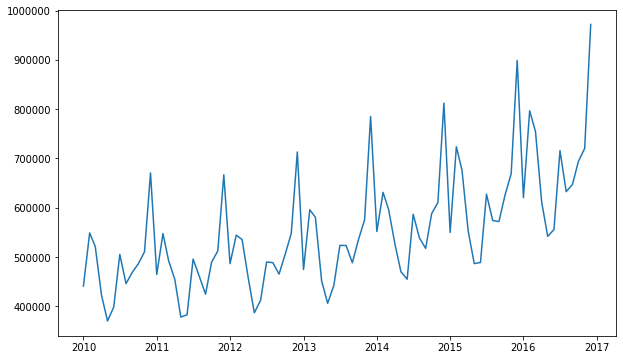

In [34]:
# 2.绘图检查
# 可以帮助我们决定模型中的两个关键因素：
# 1）季节性的周期是多少？
# 2）使用加法模型还是乘法模型？
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Data')

In [35]:
# 3.用Holt-Winters数据库来生成预测
# 在对应的代码中，我们必须提供三个参数：数据、预测的长度和季节周期。
# 我们将做12个月的预测，从检查的情况我们知道季节期也是12个月。
# 我们还从对数据的检查中知道，我们应该使用乘法模型，因为季节变化与趋势成正比。
# 预测长度
fc = 12
# 现在我们来定义季节长度
h = 12
# jupyter notebook加载本地py文件
%load holtwinter
result = holtwinter.multiplicative(y.tolist(), fc=fc, m=h)
print(result)

([440977.4743383822, 548824.1680746085, 520791.0559129277, 422576.12037365, 370320.52255754283, 398738.4658723977, 505340.0652663176, 446115.9713773049, 468797.9228396302, 486187.4808045667, 510486.1477386377, 670588.9738629711, 441108.20317132794, 573885.2698504091, 535184.8297613892, 406134.1304441777, 379989.61819094047, 414106.2238461946, 498667.08591212955, 429794.28850304487, 469406.9655226338, 451647.1462928297, 491470.0473664784, 669496.0749548536, 448824.6130950988, 602834.1610431854, 550905.5139821131, 446395.21748110635, 392946.3746890462, 417210.72616050113, 525181.1215679405, 436635.742321516, 481355.52668441756, 497961.45608940773, 525973.0084323843, 715463.2960998202, 484335.1191770371, 590780.8797975732, 572158.7236503673, 485854.1540216285, 403606.7409161297, 429961.54756300413, 554697.1022837617, 478429.93742478185, 519437.42127847334, 530716.1222400538, 556293.3391737002, 743604.3340648495, 522447.3995421005, 688280.0901013924, 643113.5453473472, 504570.0456344877, 4

In [36]:
y_smoothed = result[0][:-13]  # 拟合值，但是最后部分包括了外推预测值
y_forecast = result[1]
y_total = np.hstack((y_smoothed, y_forecast))
rmse = result[-1]
print(y_smoothed)
print(y_forecast)
print('最小均方差：{0}'.format(rmse))

[440977.4743383822, 548824.1680746085, 520791.0559129277, 422576.12037365, 370320.52255754283, 398738.4658723977, 505340.0652663176, 446115.9713773049, 468797.9228396302, 486187.4808045667, 510486.1477386377, 670588.9738629711, 441108.20317132794, 573885.2698504091, 535184.8297613892, 406134.1304441777, 379989.61819094047, 414106.2238461946, 498667.08591212955, 429794.28850304487, 469406.9655226338, 451647.1462928297, 491470.0473664784, 669496.0749548536, 448824.6130950988, 602834.1610431854, 550905.5139821131, 446395.21748110635, 392946.3746890462, 417210.72616050113, 525181.1215679405, 436635.742321516, 481355.52668441756, 497961.45608940773, 525973.0084323843, 715463.2960998202, 484335.1191770371, 590780.8797975732, 572158.7236503673, 485854.1540216285, 403606.7409161297, 429961.54756300413, 554697.1022837617, 478429.93742478185, 519437.42127847334, 530716.1222400538, 556293.3391737002, 743604.3340648495, 522447.3995421005, 688280.0901013924, 643113.5453473472, 504570.0456344877, 44

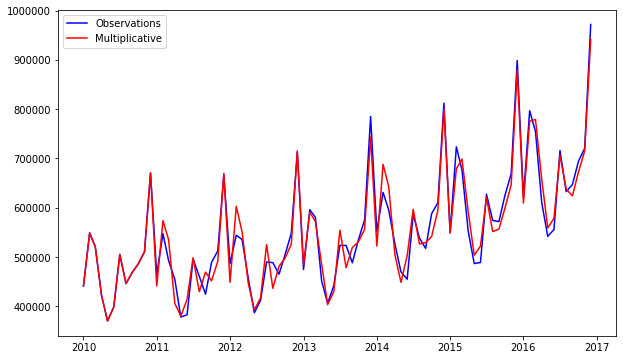

In [37]:
# 4. 检查拟合和预测结果
# 检查拟合效果
plt.figure(figsize=(10, 6))
plt.plot(x, y, c='blue', label='Observations')
plt.plot(x, y_smoothed, c='red', label='Multiplicative')
plt.legend()

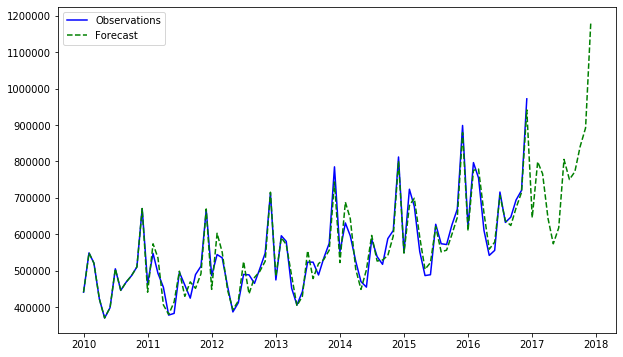

In [38]:
# 检查预测结果
plt.figure(figsize=(10, 6))
plt.plot(x, y, c='blue', label='Observations')
plt.plot(np.hstack((x, xp)),
         y_total,
         linestyle='--',
         c='green',
         label='Forecast')
plt.legend()